In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("data/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.drop("CustomerID", axis=1, inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

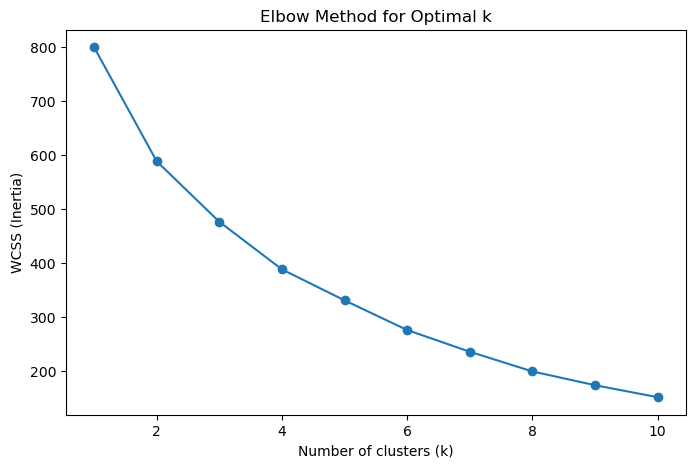

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [17]:
k_opt = 5

kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,3
1,0,21,15,81,3
2,1,20,16,6,3
3,1,23,16,77,3
4,1,31,17,40,3


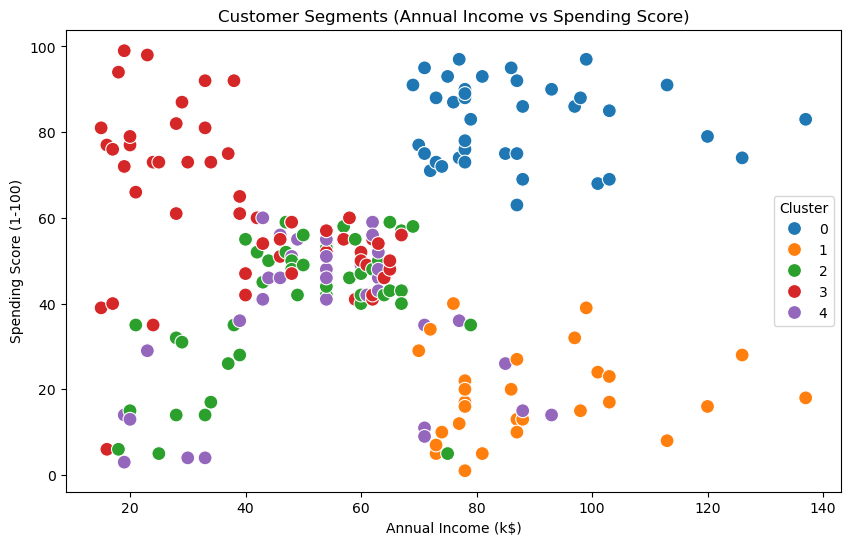

In [19]:
# Scatter plot of Annual Income vs Spending Score colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='tab10',
                s=100)
plt.title("Customer Segments (Annual Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()


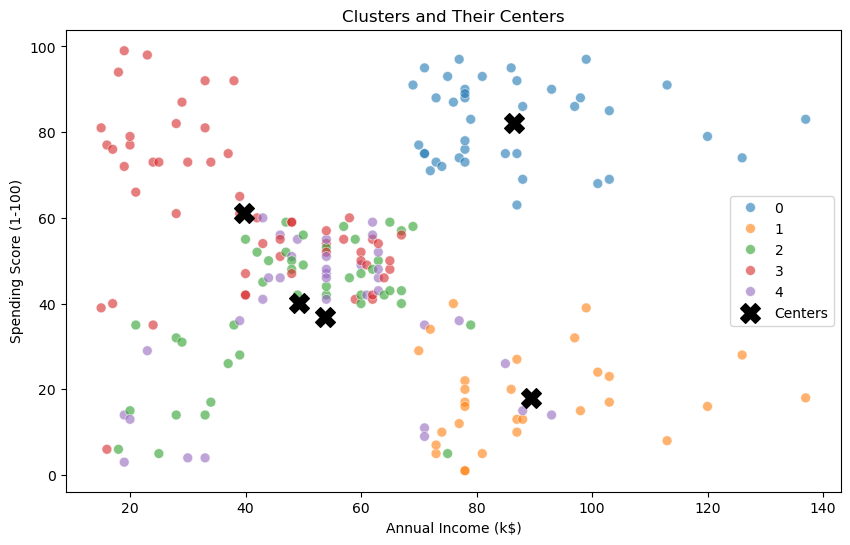

In [21]:
# Retrieve and inverse-transform cluster centers to original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for centers
centers_df = pd.DataFrame(centers, columns=features)

# Plot centers on the same scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette='tab10', s=50, alpha=0.6)
plt.scatter(centers_df['Annual Income (k$)'],
            centers_df['Spending Score (1-100)'],
            c='black', s=200, marker='X', label='Centers')
plt.title("Clusters and Their Centers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [23]:
# Group by cluster and compute means
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)


         Gender    Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                           
0          0.54  32.69               86.54                   82.13
1          0.55  36.48               89.52                   18.00
2          1.00  49.81               49.23                   40.07
3          0.59  24.91               39.72                   61.20
4          0.00  55.71               53.69                   36.77
